In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np

In [41]:
class EDO(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = x*dy + y_pred -tf.pow(x,2.)*tf.cos(x)#Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 0. #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0., eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [42]:
modelo = EDO()

modelo.add(Dense(10, activation='tanh', input_shape=(1,)))
modelo.add(Dense(1, activation='tanh'))
modelo.add(Dense(1))


modelo.summary()

Model: "edo_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                20        
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


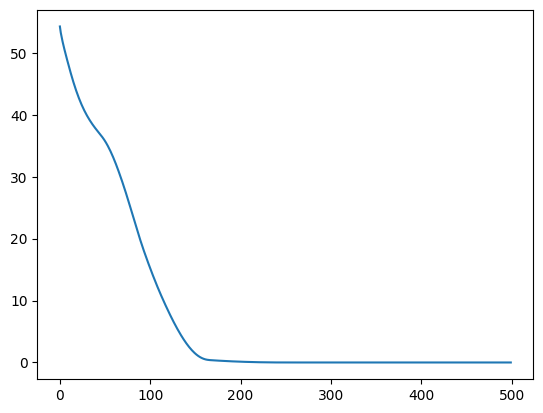

In [43]:
modelo.compile(optimizer=RMSprop(),metrics=['loss'])

x=tf.linspace(5,5,100)
history = modelo.fit(x,epochs=500,verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 3ms/step


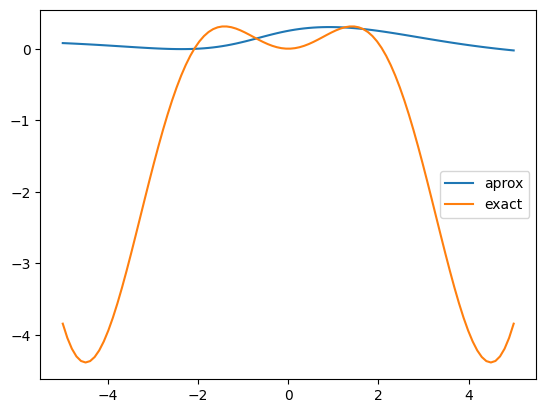

In [57]:
x_testv = tf.linspace(-5,5,100)
x=np.linspace(-5,5,100)
a=modelo.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,((x**2 - 2) * np.sin(x)) / x + 2 * np.cos(x),label="exact")
plt.legend()
plt.show()

In [52]:
class EDO(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                with tf.GradientTape() as tape3:
                    tape3.watch(x)
                    y_pred = self(x, training=True)
                tape2.watch(x)
                dy =tape3.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             ddy = tape2.gradient(dy, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             dy_0= self(x_o,training=True) #valor de dy en x_0
             eq = ddy+y_pred#Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 1. #valor que queremos para la condicion inicial o el modelo en x_0
             ic2= -0.5 #valor que queremos para la condicion inicial o el modelo en x_0 para la primera derivada
             loss = self.mse(0., eq) + self.mse(y_o,ic) + self.mse(y_o,ic2)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [53]:
modelo = EDO()

modelo.add(Dense(10, activation='tanh', input_shape=(1,)))
modelo.add(Dense(1, activation='tanh'))
modelo.add(Dense(1))


modelo.summary()

Model: "edo_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
 dense_38 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


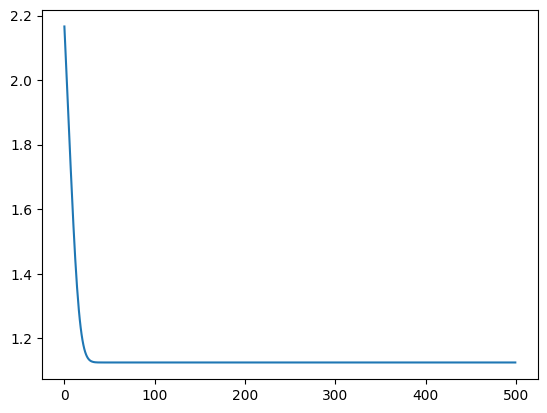

In [54]:
modelo.compile(optimizer=Adam(),metrics=['loss'])

x=tf.linspace(5,5,100)
history = modelo.fit(x,epochs=500,verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 4ms/step


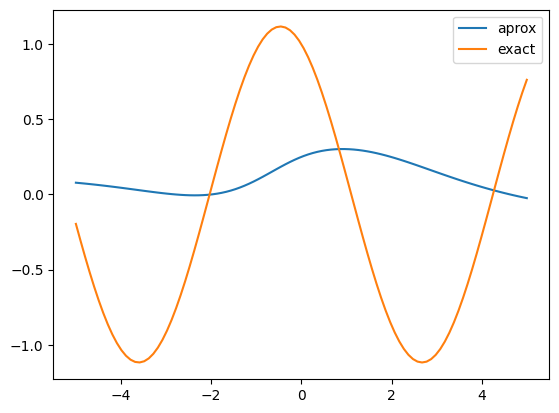

In [56]:
x_testv = tf.linspace(-5,5,100)
x=np.linspace(-5,5,100)
a=modelo.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,np.cos(x)-np.sin(x)/2.,label="exact")
plt.legend()
plt.show()

Para este codigo intente exportar la estrucyura que manejaba en los ejemplos que nos dió en teams, usando de base el codigo ODEsolver.

Para la primera ec. dif. cambié los valores a la variable eq para que estuviera de acuerdo a la ec. de la tarea, despejando el término x^2cos(x) para que la eq fuera igual a 0, también cambié la variable ic a ic=0 para que compliera con las condiciones iniciales de la ecuacion.
Una vez usando la red me dí cuenta que no correspondía a la red y supuse que algo estaba mal en laparte del codio de entrenamiento ODE, trate de cambiar la eq a la origunal, cambiando el objetivo de la mse de 0 a x^2*cos(x) (siempre teniendo cuidado de que corresponda al formato que maneja tensorflow), y no dió muy buneos resultados. La dejé como estaba y pase a probar con la arquitectura de la red y  el optimizador y no hubo una mejoria

Para la siguiente me pasó lo mismo, para hacer la eq anide otro gradient_tape para calcular la derivada del calculo previo de la primera derivada, llamandola ddy. Tuve cuidado de que correspondieran los valores iniciales y le agregué otro mse a la función de costo (ya que había una condición más). A pesar de esto, al entrenarlo no vi mejoría, por lo que supuse que algo estoy olvidadando o haciendo mal en el codigo de el entrenamietno EDO. :(